### Downloading and Installing the Necessary Libraries in the Workspace

In [436]:
!pip install geopy
!pip install vaderSentiment
!pip install tensorflow
!pip install wordcloud
!pip install scikit-learn
!pip install nltk
!pip install keras
import pandas as pd,  numpy as np
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline 
from geopy.geocoders import Nominatim
from time import sleep
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from scipy.stats import chisquare
from keras.layers import Conv1D, Dense, Flatten, Embedding
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import f_oneway
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Loading the Dataset for this Study

In [497]:
df = pd.read_csv("nigerian_presidential_election_2023_tweets.csv", low_memory=False)


##### Dropping Columns with NA from the Datset
##### Making a copy of the Dataset

In [498]:
df=df.dropna()
df1 = df.copy()

#### Performing Exploratory Data Analysis on the Dataset

In [499]:
#Confirm the Shape of the Dataset
print(f"data shape: {df.shape}")

data shape: (31871, 16)


In [500]:

df.head()

id                        user_name       user_location  \
0   1617619263392743424                    Fabulous Faga  Abakaliki, Nigeria   
1   1617648566977302534               Patriotic Nigerian      Lagos, Nigeria   
6   1617657186477568002                     Iyorchia Ayu             Nigeria   
10  1617608440532332544  Umar A. Mustapha mni, OON,ESAN🗯             Nigeria   
12  1617690091048275968                          endsars             Nigeria   

                                     user_description  \
0   🌹A Social media influencer\n💃A scientist by pr...   
1   inspiring and amazingly created. Marketing/ Br...   
6   Former President of The Nigerian Senate.\n\nFo...   
10  Founder/CEO ALFASon Links Ng Ltd,Politician,Cl...   
12  There is strength in numbers . This walk is to...   

                 user_created user_followers user_friends user_favourites  \
0   2020-10-19 08:02:47+00:00            244          999             686   
1   2021-03-30 22:04:11+00:00            688         2827            3488   
6   2022-02-20 18:00:49+00:00          15320           14              41   
10  2019-10-05 18:07:35+00:00           1939         1878             885   
12  2010-12-23 20:51:43+00:00            347          800            1501   

   user_verified                       date  \
0          False  2023-01-23 20:24:20+00:00   
1          False  2023-01-23 22:20:47+00:00   
6          False  2023-01-23 22:55:02+00:00   
10         False  2023-01-23 19:41:20+00:00   
12         False  2023-01-24 01:05:47+00:00   

                                                 text  \
0   #OBI and #wife storm kastina state today.\n\nS...   
1   If they can’t point to you one project , inves...   
6   Earlier today in Bayelsa for Atiku/Okowa Presi...   
10  Do make your vote 🗳 count!\n#AtikuOkowa2023  #...   
12   Hmmm just vote #obidatti https://t.co/G57qsqvEIq   

                                             hashtags               source  \
0                                     ['OBI', 'wife']  Twitter for Android   
1                               ['peterobi', 'Atiku']   Twitter for iPhone   
6                           ['pdp', 'AtikuInBayelsa']   Twitter for iPhone   
10  ['AtikuOkowa2023', 'AtikuInBayelsa', 'atiku', ...   Twitter for iPhone   
12                                       ['obidatti']   Twitter for iPhone   

   retweets  favorites is_retweet  
0       0.0        5.0      False  
1      11.0       15.0      False  
6      55.0      338.0      False  
10      2.0        2.0      False  
12      0.0        0.0      False

#### Visualize the Columns and Dta Types in the Dataset

In [501]:
df.info()
info_dict = {
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum(),
    "Dtype": df.dtypes
}

info_df = pd.DataFrame(info_dict)
info_df.to_csv('df_info.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31871 entries, 0 to 85578
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                31871 non-null  object 
 1   user_name         31871 non-null  object 
 2   user_location     31871 non-null  object 
 3   user_description  31871 non-null  object 
 4   user_created      31871 non-null  object 
 5   user_followers    31871 non-null  object 
 6   user_friends      31871 non-null  object 
 7   user_favourites   31871 non-null  object 
 8   user_verified     31871 non-null  object 
 9   date              31871 non-null  object 
 10  text              31871 non-null  object 
 11  hashtags          31871 non-null  object 
 12  source            31871 non-null  object 
 13  retweets          31871 non-null  object 
 14  favorites         31871 non-null  float64
 15  is_retweet        31871 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

#### Checking for Total Number and Percentage of Missing Data

In [502]:
#Calculating the percentage of missing data and 
#Checking for the total amount of missing data

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum() / data.isnull().count() * 100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = [str(data[col].dtype) for col in data.columns]
    tt['Types'] = types
    transposed_tt = np.transpose(tt)
    
    transposed_tt.to_csv('missing_data_info.csv')
    
    return transposed_tt

result = missing_data(df)
result

id user_name user_location user_description user_created  \
Total         0         0             0                0            0   
Percent     0.0       0.0           0.0              0.0          0.0   
Types    object    object        object           object       object   

        user_followers user_friends user_favourites user_verified    date  \
Total                0            0               0             0       0   
Percent            0.0          0.0             0.0           0.0     0.0   
Types           object       object          object        object  object   

           text hashtags  source retweets favorites is_retweet  
Total         0        0       0        0         0          0  
Percent     0.0      0.0     0.0      0.0       0.0        0.0  
Types    object   object  object   object   float64     object

##### Comfirming the Total Number of Unique Values in the Dataset

In [503]:
#Checking for the total amount of unique values in the data
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(df)

id  user_name  user_location  user_description  user_created  \
Total    31871      31871          31871             31871         31871   
Uniques  31871      14872           4821             15140         14883   

         user_followers  user_friends  user_favourites  user_verified   date  \
Total             31871         31871            31871          31871  31871   
Uniques            7892          4621            11580              2  30084   

          text  hashtags  source  retweets  favorites  is_retweet  
Total    31871     31871   31871     31871      31871       31871  
Uniques  30539     10965     117       352        443           1

#### Checking for the Total Number and Percentage of Frequent Values in the Dataset

In [504]:
#Checking for the total amount of frequent values in the data
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))
most_frequent_values(df)

id     user_name   user_location  \
Total                             31871         31871           31871   
Most frequent item  1617619263392743424  Reuben Abati  Lagos, Nigeria   
Frequence                             1           365            4343   
Percent from total                0.003         1.145          13.627   

                                                     user_description  \
Total                                                           31871   
Most frequent item  Journalist, Writer, Official Presidential Spok...   
Frequence                                                         362   
Percent from total                                              1.136   

                                 user_created user_followers user_friends  \
Total                                   31871          31871        31871   
Most frequent item  2012-06-04 06:40:07+00:00             25         1392   
Frequence                                 365            381          333   
Percent from total                      1.145          1.195        1.045   

                   user_favourites user_verified                       date  \
Total                        31871         31871                      31871   
Most frequent item             313         False  2023-03-18 15:00:03+00:00   
Frequence                      296         29833                         11   
Percent from total           0.929        93.605                      0.035   

                                                                 text  \
Total                                                           31871   
Most frequent item  Good evening, remember to vote Labour Party at...   
Frequence                                                          17   
Percent from total                                              0.053   

                                  hashtags               source retweets  \
Total                                31871                31871    31871   
Most frequent item  ['NigeriaDecides2023']  Twitter for Android      0.0   
Frequence                             7882                16164    17961   
Percent from total                  24.731               50.717   56.355   

                   favorites is_retweet  
Total                  31871      31871  
Most frequent item       0.0      False  
Frequence              16030      31871  
Percent from total    50.297      100.0

## EXPLORATORY DATA ANALYSIS (EDA)

#### Checking the Number of Users by Location

In [505]:
# location 
df.user_location.value_counts()
df["location"]=df.user_location.str.split(",", expand=True)[0]
df["location"]= df["location"].str.split(",", expand=True)[0]
df.location.value_counts()

Lagos                        5299
Nigeria                      4359
Abuja                        2318
Kaduna                        770
Federal Capital Territory     636
                             ... 
Little Canada                   1
Kaduna / Abuja                  1
Kent                            1
Mississippi                     1
Blessed Avenue Lagos            1
Name: location, Length: 4204, dtype: int64

#### Number of Unique Locations

In [506]:

df.location.nunique()

4204

In [507]:
# A function to clean the location names
def clean_location(location):
    # Convert to lowercase and remove leading/trailing spaces
    location = location.strip().title()
    
    # Replace common variations with "Nigeria"
    if 'nigeria' in location:
        return 'Nigeria'
    
    # Return cleaned location if it's not Nigeria
    return location

# Apply the cleaning function to the 'user_location' column
df['location'] = df['location'].apply(clean_location)

#### Distribution of Users by the Top 10 Locations

Lagos                        5455
Nigeria                      5117
Abuja                        2374
Kaduna                        779
Federal Capital Territory     638
London                        432
Africa                        409
Port Harcourt                 404
Ibadan                        297
Jos                           291
Name: location, dtype: int64


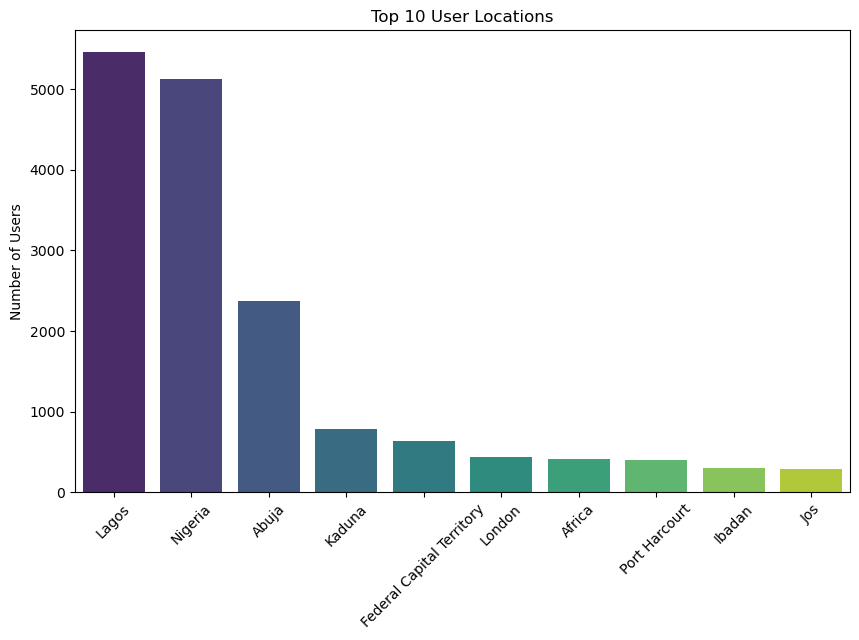

In [508]:
# Distribution of user locations
location_counts = df['location'].value_counts().head(10)
print(location_counts)


plt.figure(figsize=(10,6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 User Locations')
plt.xticks(rotation=45)
plt.ylabel('Number of Users')
plt.show()


#### Word Cloud Showing the Most Pravelent Locations


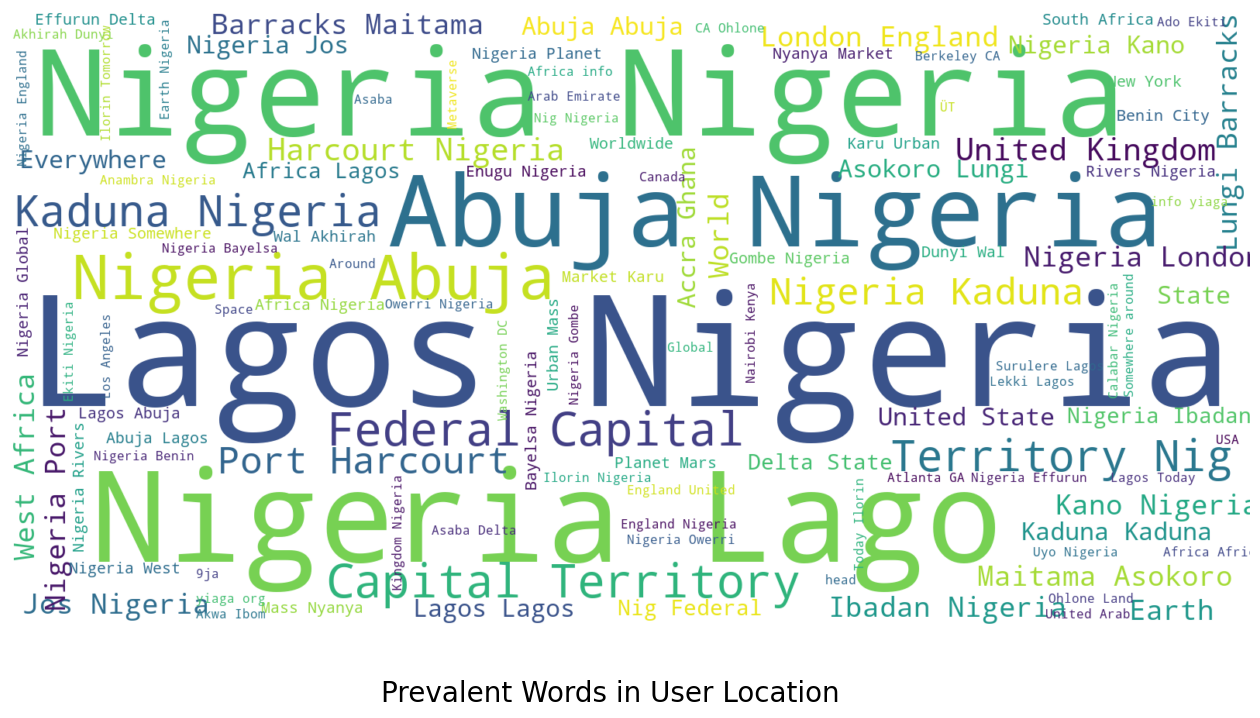

In [509]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    
    
show_wordcloud(df['user_location'], title = 'Prevalent Words in User Location')

#### Top 10 Hashtags

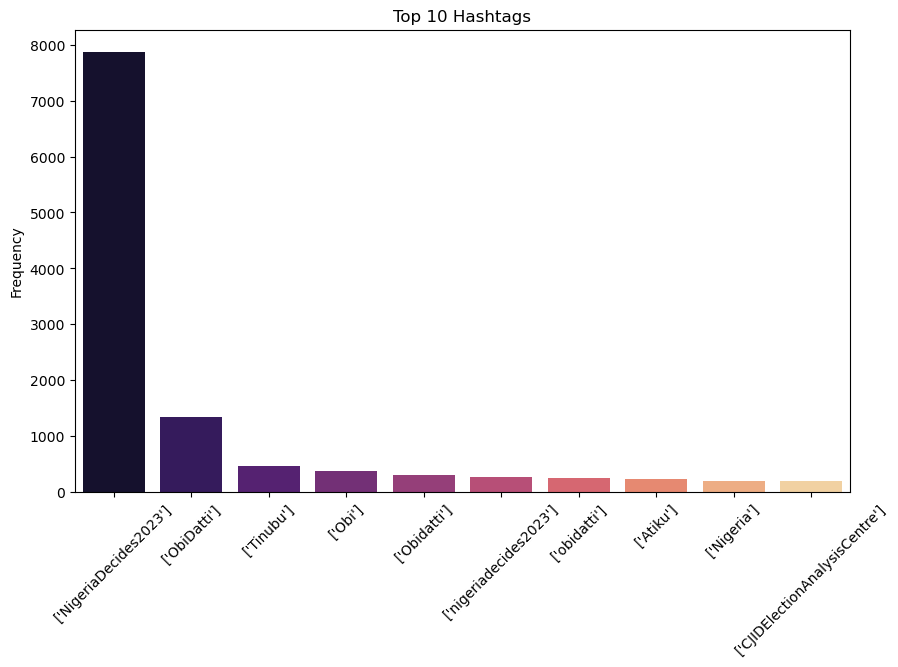

In [510]:
# Flatten the list of hashtags into a single series
hashtags = df['hashtags'].explode()

# Count the most frequent hashtags
hashtag_counts = hashtags.value_counts().head(10)

# Plot the top 10 hashtags
plt.figure(figsize=(10,6))
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='magma')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()


In [511]:
#### Most Prevalent Words in Hashtags

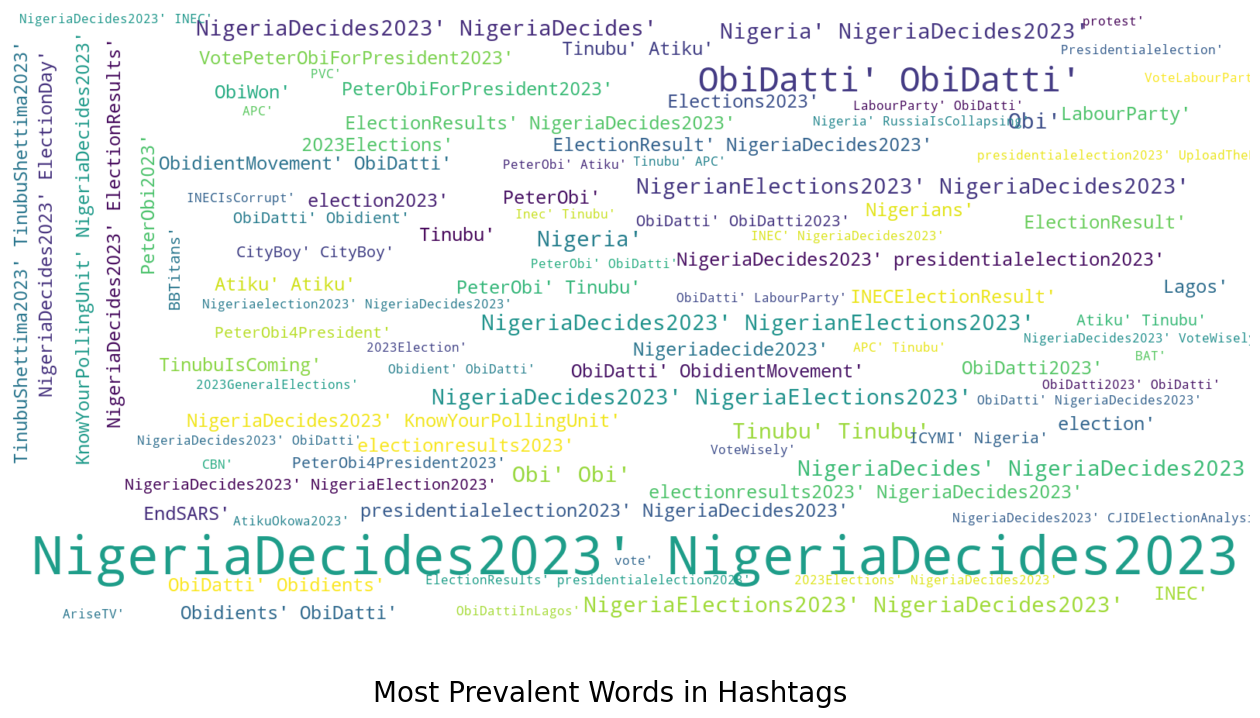

In [512]:
show_wordcloud(df['hashtags'], title = 'Most Prevalent Words in Hashtags')

#### Tweets Frequency over the period

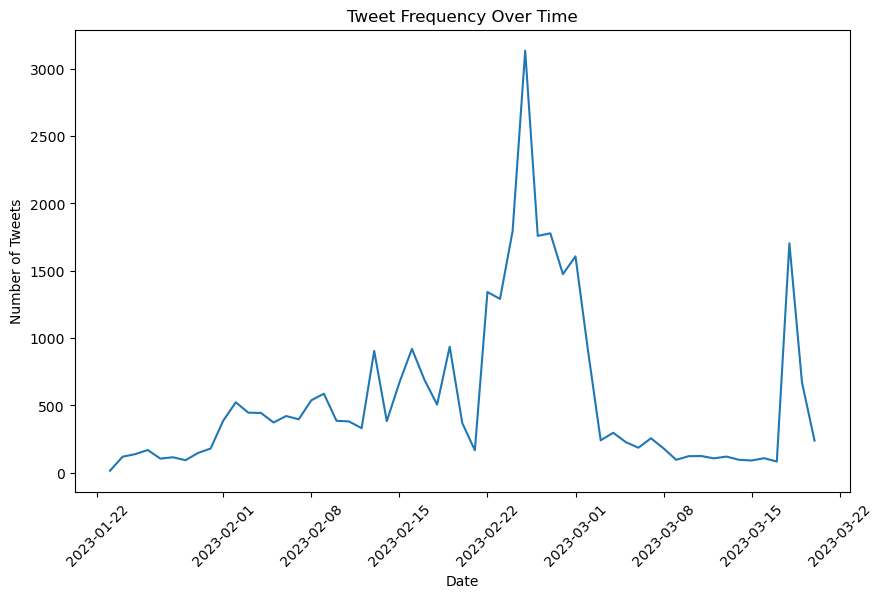

In [513]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract date and hour for analysis
df['date_only'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour

# Group by date to see tweet frequency over time
tweets_by_date = df.groupby('date_only').size()

# Plot tweet frequency over time
plt.figure(figsize=(10,6))
tweets_by_date.plot()
plt.title('Tweet Frequency Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


#### Most Prevalent Words in Tweets

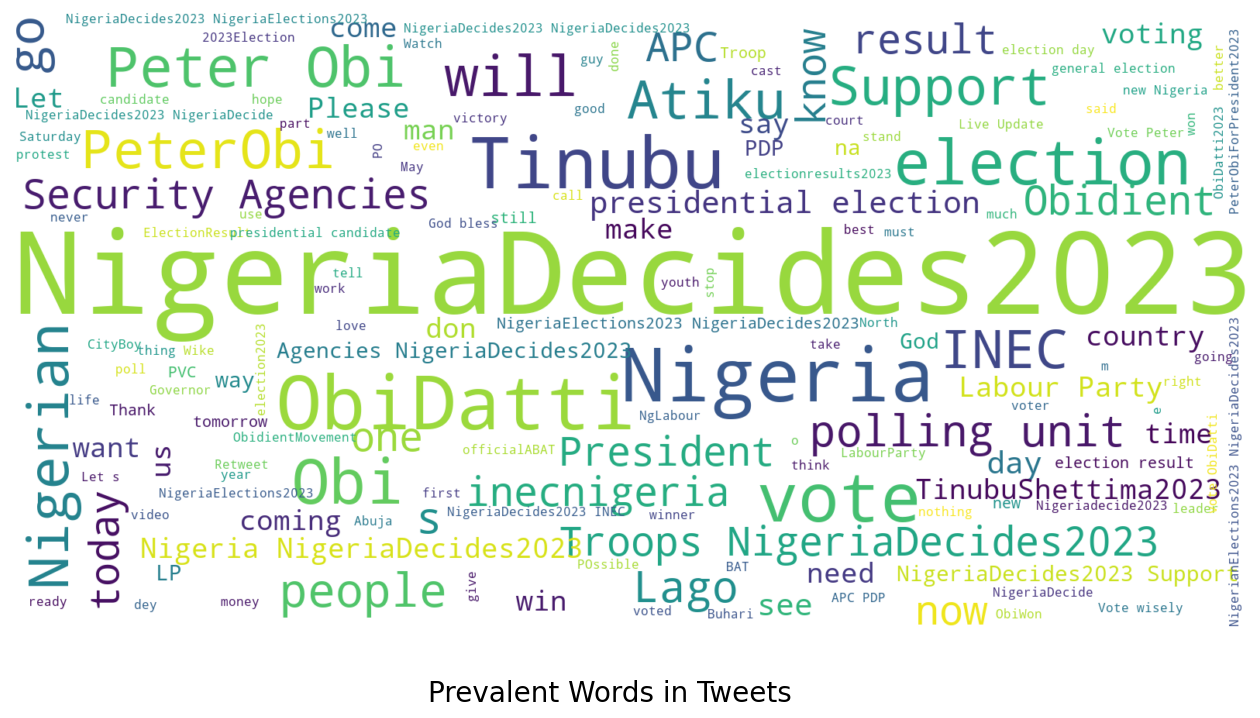

In [514]:
show_wordcloud(df['text'], title = 'Prevalent Words in Tweets')

## SENTIMENTAL ANALYSIS

#### Initialize VADER sentiment analyzer

In [515]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

df['sentiment_scores'] = df['text'].apply(get_sentiment_scores)

df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

df['sentiment'] = df['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

output_df = df[['text', 'compound', 'sentiment']]
output_df.to_csv('sentiment_analysis_results.csv', index=False)
output_df

text  compound sentiment
0      #OBI and #wife storm kastina state today.\n\nS...    0.6249  positive
1      If they can’t point to you one project , inves...    0.2500  positive
6      Earlier today in Bayelsa for Atiku/Okowa Presi...    0.3612  positive
10     Do make your vote 🗳 count!\n#AtikuOkowa2023  #...    0.0000   neutral
12      Hmmm just vote #obidatti https://t.co/G57qsqvEIq    0.0000   neutral
...                                                  ...       ...       ...
85543  BENUE POLLS: Soliders allegedly gun down ballo...   -0.3400  negative
85544  #CJIDElectionAnalysisCentre Live Updates from ...    0.0000   neutral
85548  The President of the Senate, Ahmed Lawan, cast...    0.0000   neutral
85556  Voters complained about INEC ad-hoc staff arri...   -0.4019  negative
85578  My attention has been drawn to social media po...    0.0000   neutral

[31871 rows x 3 columns]

#### Obtaining a Count of the Sentiment Clasifications

In [516]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

positive    14808
neutral     11217
negative     5846
Name: sentiment, dtype: int64

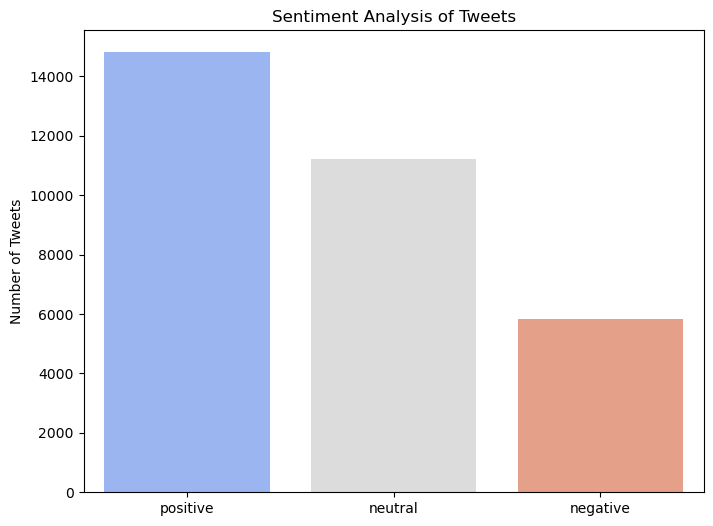

In [517]:
# Plot sentiment distribution
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Analysis of Tweets')
plt.ylabel('Number of Tweets')
plt.show()

In [518]:
#### TweetSentiment Over Time

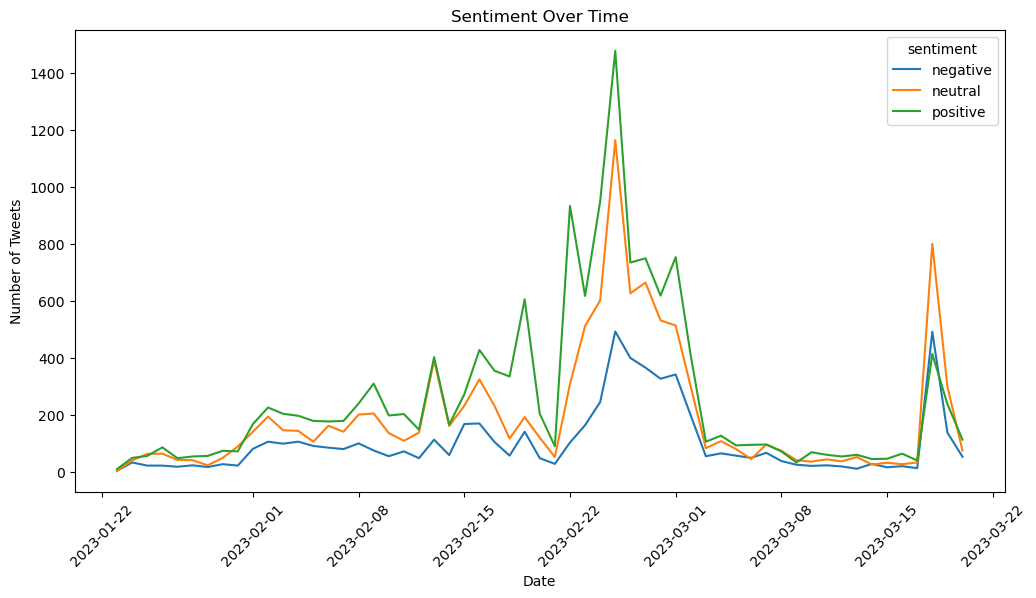

In [519]:
df['date'] = pd.to_datetime(df['date'])
df['date_only'] = df['date'].dt.date
sentiment_over_time = df.groupby(['date_only', 'sentiment']).size().unstack()

# Plot sentiment trends over time
sentiment_over_time.plot(figsize=(12,6))
plt.title('Sentiment Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


#### Prevalent Words by Positive Sentiments 

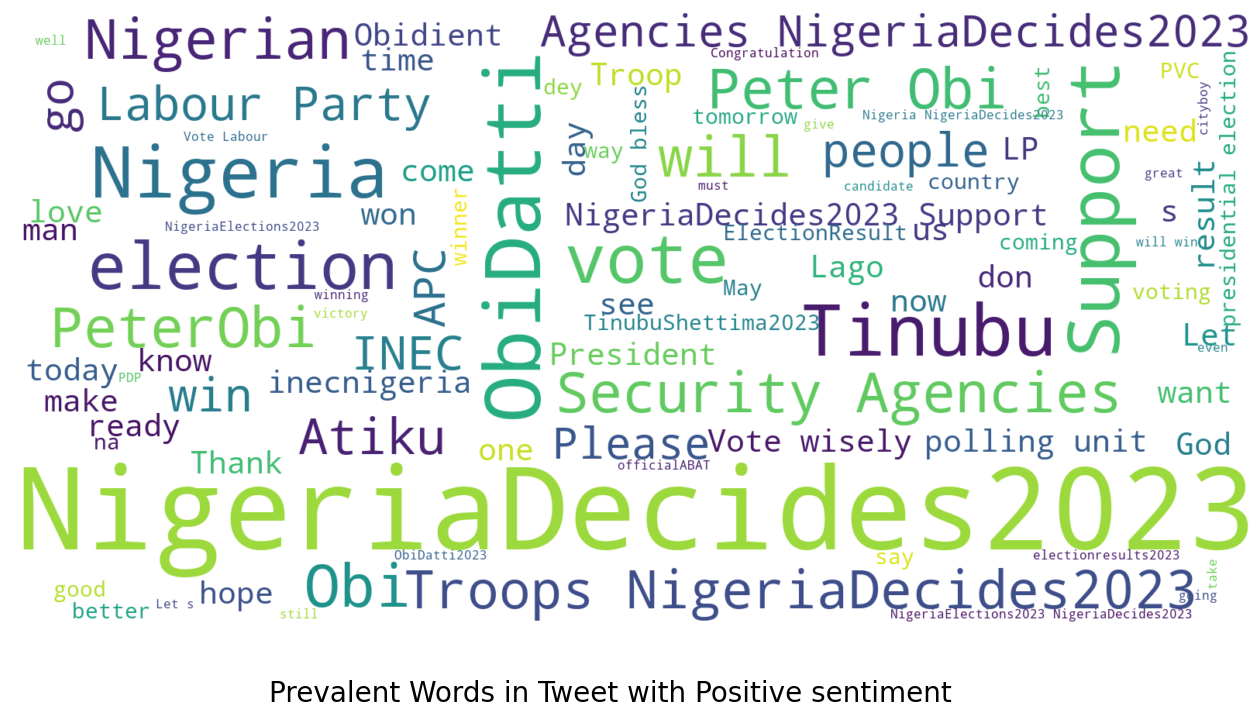

In [520]:
show_wordcloud(df.loc[df['sentiment']=="positive", 'text'], title = 'Prevalent Words in Tweet with Positive sentiment', mask=None)

#### Prevalent Words by Negative Sentiments 

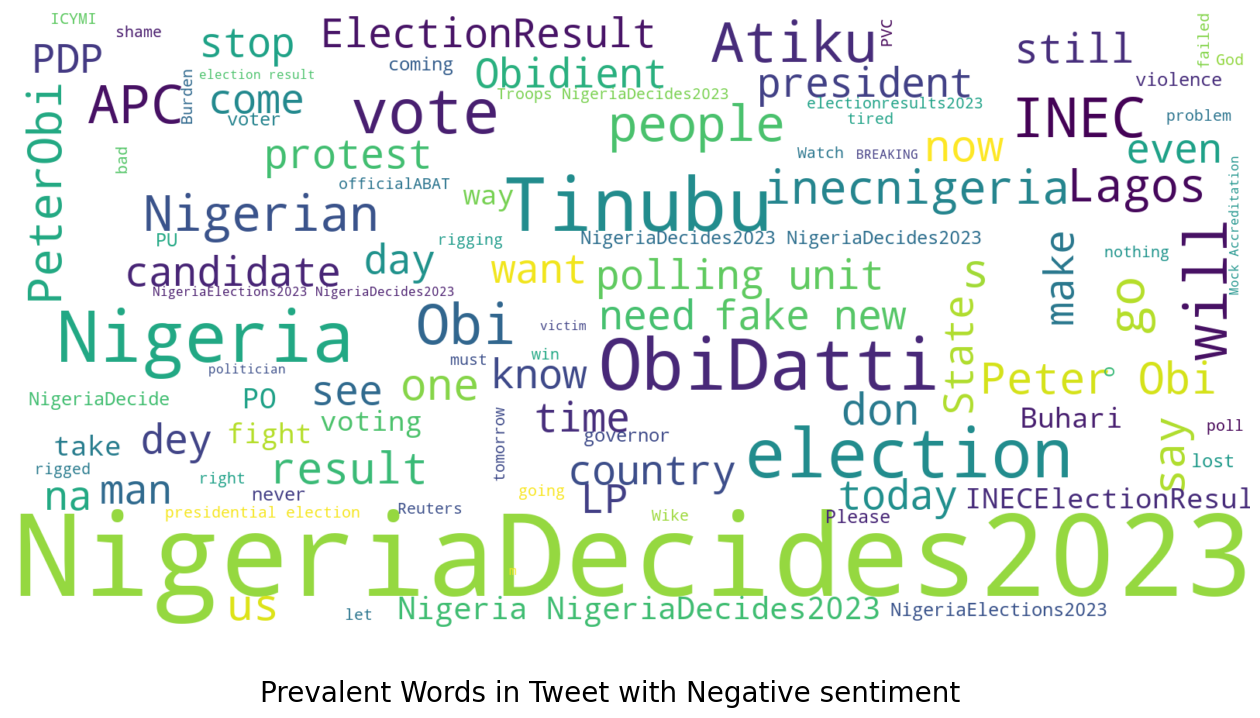

In [521]:
show_wordcloud(df.loc[df['sentiment']=="negative", 'text'], title = 'Prevalent Words in Tweet with Negative sentiment', mask=None)

#### Prevalent Words by Neutral Sentiments 

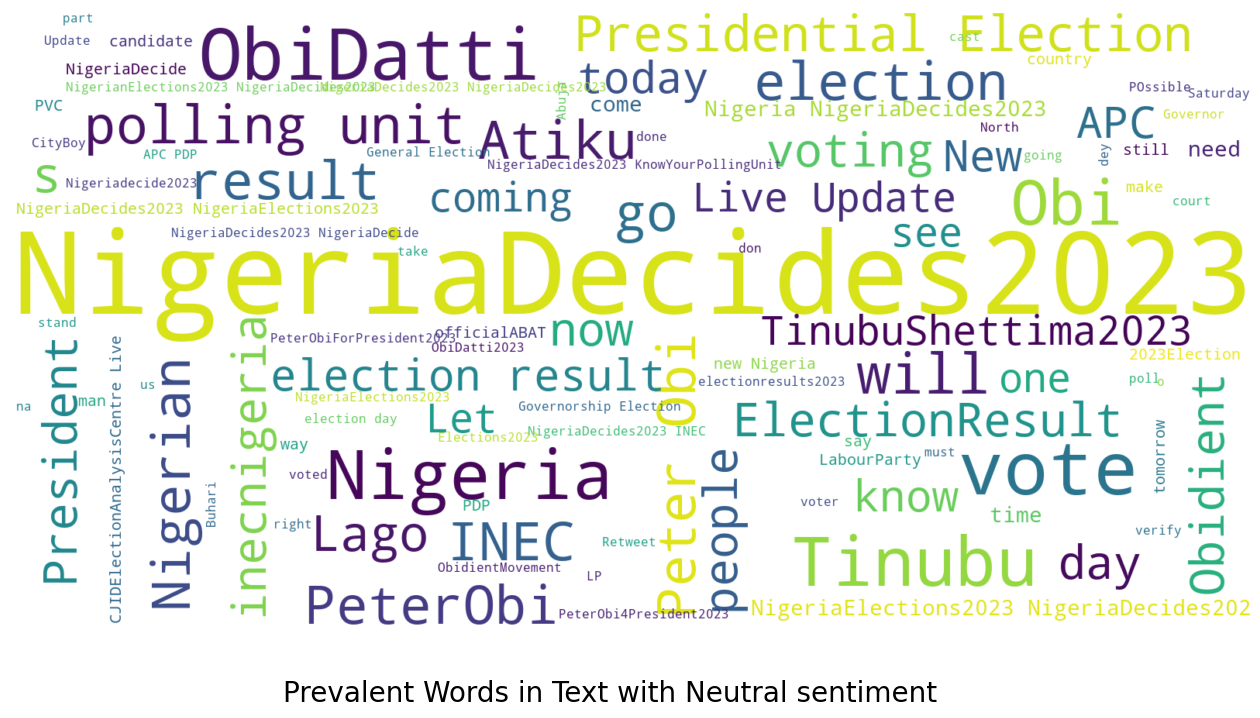

In [522]:
show_wordcloud(df.loc[df['sentiment']=="neutral", 'text'], title = 'Prevalent Words in Text with Neutral sentiment', mask=None)

#### Obtaining Sentiment Scores

In [523]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # Extract the compound sentiment score

# Apply sentiment analysis to the 'text' column
df['compound'] = df['text'].apply(get_sentiment)



#### Categorizing Sentiments Based on Compound Score

In [524]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Classify the sentiment of each tweet
df['sentiment'] = df['compound'].apply(categorize_sentiment)



#### Filter tweets by Candidates Mentioned

In [525]:
df['mentions_obi'] = df['text'].str.contains('Obi', case=False, na=False)
df['mentions_atiku'] = df['text'].str.contains('Atiku', case=False, na=False)
df['mentions_tinubu'] = df['text'].str.contains('Tinubu', case=False, na=False)



#### Separating Dataframes for Each Candidate

In [526]:
obi_df = df[df['mentions_obi']].copy()
atiku_df = df[df['mentions_atiku']].copy()
tinubu_df = df[df['mentions_tinubu']].copy()



#### Displaying Sentiment Counts by Candidate

In [527]:

print("Sentiment Counts for Obi:")
print(obi_df['sentiment'].value_counts())



Sentiment Counts for Obi:
positive    4929
neutral     3339
negative    1519
Name: sentiment, dtype: int64


In [528]:
print("\nSentiment Counts for Atiku:")
print(atiku_df['sentiment'].value_counts())


Sentiment Counts for Atiku:
positive    729
neutral     634
negative    342
Name: sentiment, dtype: int64


In [529]:
print("\nSentiment Counts for Tinubu:")
print(tinubu_df['sentiment'].value_counts())


Sentiment Counts for Tinubu:
positive    2121
neutral     1642
negative     796
Name: sentiment, dtype: int64


#### Plotting Sentiment Distributions by Candidates

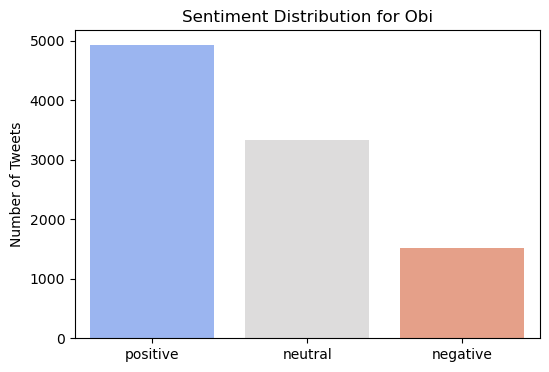

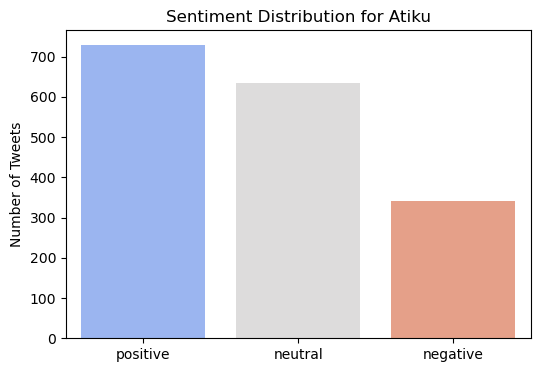

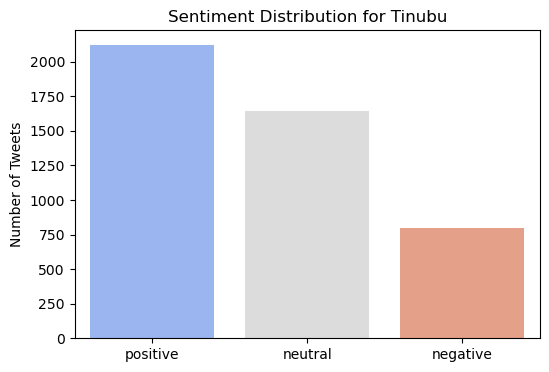

In [530]:

def plot_sentiment_distribution(candidate_df, candidate_name):
    sentiment_counts = candidate_df['sentiment'].value_counts()
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
    plt.title(f'Sentiment Distribution for {candidate_name}')
    plt.ylabel('Number of Tweets')
    plt.show()

# Plot sentiment for each candidate
plot_sentiment_distribution(obi_df, 'Obi')
plot_sentiment_distribution(atiku_df, 'Atiku')
plot_sentiment_distribution(tinubu_df, 'Tinubu')

#### Sentiments for Candidate Obi Over Time

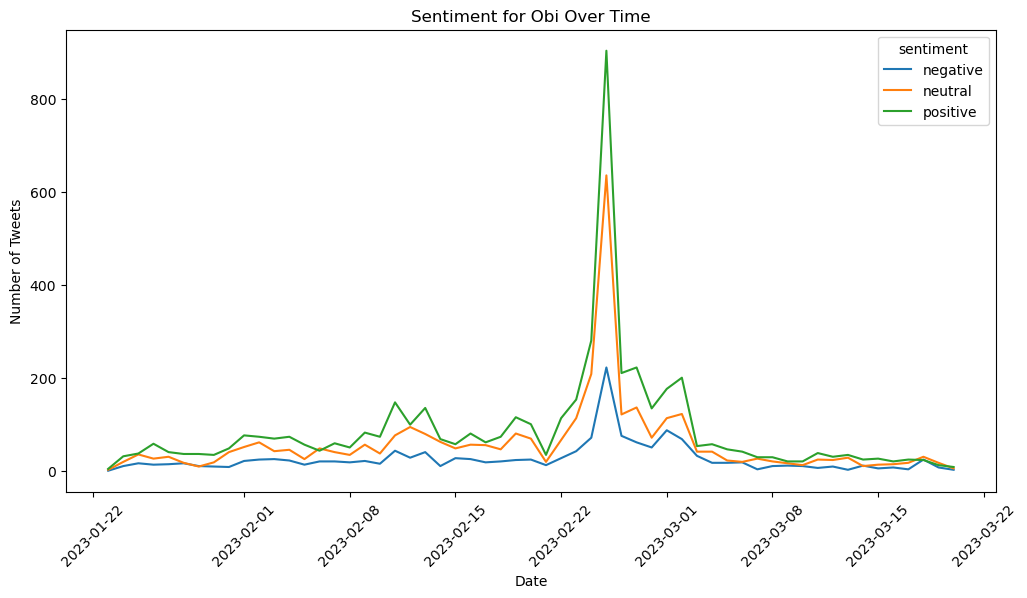

In [531]:
# Convert 'date' to datetime format (if not already done)
obi_df['date'] = pd.to_datetime(obi_df['date'])

# Extract date without time
obi_df['date_only'] = obi_df['date'].dt.date

# Group by date and sentiment to get the sentiment counts over time
sentiment_over_time = obi_df.groupby(['date_only', 'sentiment']).size().unstack()

# Plot sentiment trends over time
sentiment_over_time.plot(figsize=(12,6))
plt.title('Sentiment for Obi Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


#### Sentiments for Candidate Tinubu Over Time

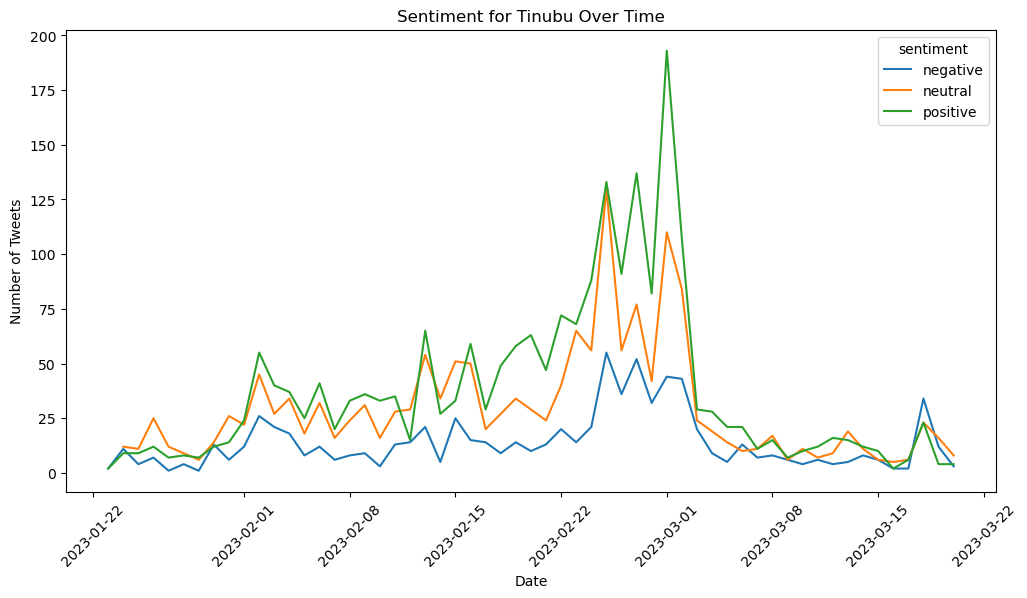

In [532]:
# Convert 'date' to datetime format (if not already done)
tinubu_df['date'] = pd.to_datetime(tinubu_df['date'])

# Extract date without time
tinubu_df['date_only'] = tinubu_df['date'].dt.date

# Group by date and sentiment to get the sentiment counts over time
sentiment_over_time = tinubu_df.groupby(['date_only', 'sentiment']).size().unstack()

# Plot sentiment trends over time
sentiment_over_time.plot(figsize=(12,6))
plt.title('Sentiment for Tinubu Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


#### Sentiments for Candidate Atiku Over Time

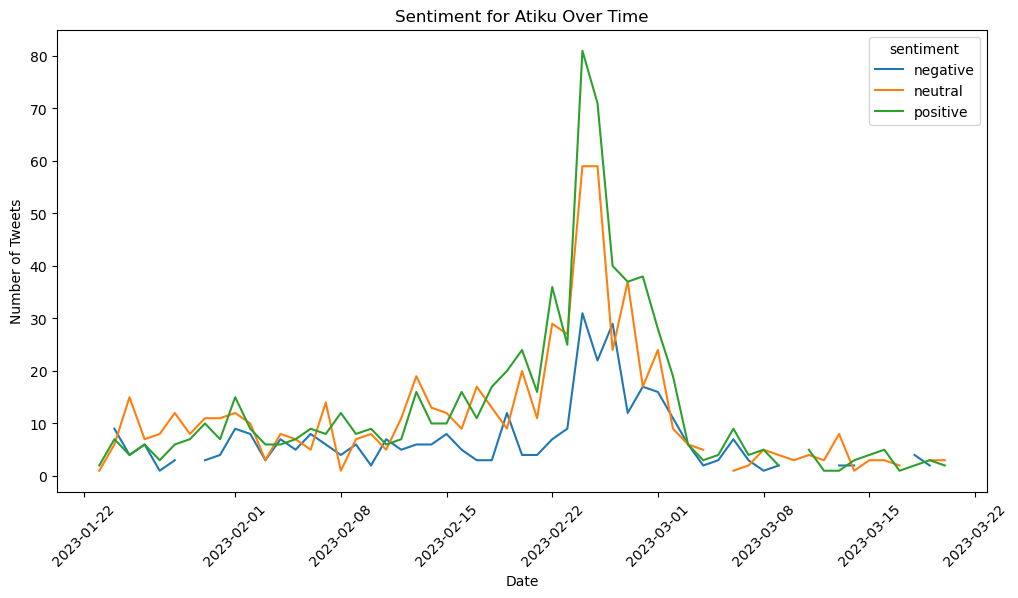

In [533]:
# Convert 'date' to datetime format (if not already done)
atiku_df['date'] = pd.to_datetime(atiku_df['date'])

# Extract date without time
atiku_df['date_only'] = atiku_df['date'].dt.date

# Group by date and sentiment to get the sentiment counts over time
sentiment_over_time = atiku_df.groupby(['date_only', 'sentiment']).size().unstack()

# Plot sentiment trends over time
sentiment_over_time.plot(figsize=(12,6))
plt.title('Sentiment for Atiku Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


#### Visualizing our Updated Dataset with New Features Including Sentiment Distributions

In [534]:
df.head()

id                        user_name       user_location  \
0   1617619263392743424                    Fabulous Faga  Abakaliki, Nigeria   
1   1617648566977302534               Patriotic Nigerian      Lagos, Nigeria   
6   1617657186477568002                     Iyorchia Ayu             Nigeria   
10  1617608440532332544  Umar A. Mustapha mni, OON,ESAN🗯             Nigeria   
12  1617690091048275968                          endsars             Nigeria   

                                     user_description  \
0   🌹A Social media influencer\n💃A scientist by pr...   
1   inspiring and amazingly created. Marketing/ Br...   
6   Former President of The Nigerian Senate.\n\nFo...   
10  Founder/CEO ALFASon Links Ng Ltd,Politician,Cl...   
12  There is strength in numbers . This walk is to...   

                 user_created user_followers user_friends user_favourites  \
0   2020-10-19 08:02:47+00:00            244          999             686   
1   2021-03-30 22:04:11+00:00            688         2827            3488   
6   2022-02-20 18:00:49+00:00          15320           14              41   
10  2019-10-05 18:07:35+00:00           1939         1878             885   
12  2010-12-23 20:51:43+00:00            347          800            1501   

   user_verified                      date  ... is_retweet   location  \
0          False 2023-01-23 20:24:20+00:00  ...      False  Abakaliki   
1          False 2023-01-23 22:20:47+00:00  ...      False      Lagos   
6          False 2023-01-23 22:55:02+00:00  ...      False    Nigeria   
10         False 2023-01-23 19:41:20+00:00  ...      False    Nigeria   
12         False 2023-01-24 01:05:47+00:00  ...      False    Nigeria   

     date_only hour                                   sentiment_scores  \
0   2023-01-23   20  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...   
1   2023-01-23   22  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...   
6   2023-01-23   22  {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...   
10  2023-01-23   19  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
12  2023-01-24    1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

   compound sentiment mentions_obi  mentions_atiku mentions_tinubu  
0    0.6249  positive         True           False           False  
1    0.2500  positive         True            True           False  
6    0.3612  positive        False            True           False  
10   0.0000   neutral         True            True           False  
12   0.0000   neutral         True           False           False  

[5 rows x 25 columns]

## Data Preparation for the Models

In [535]:
use = ["date_only","user_location", "sentiment", "mentions_obi", "mentions_atiku", "mentions_tinubu"]
new_df = df[use]
new_df.sample(5)

date_only   user_location sentiment  mentions_obi  mentions_atiku  \
42296  2023-02-24  Abuja, Nigeria  positive         False           False   
3910   2023-01-28           Lagos   neutral          True           False   
58609  2023-02-28  Lagos, Nigeria  positive          True           False   
68038  2023-03-02         Nigeria   neutral          True           False   
44096  2023-02-25  Lagos, Nigeria  positive          True           False   

       mentions_tinubu  
42296            False  
3910             False  
58609            False  
68038             True  
44096             True

In [536]:
df1["text"]

0        #OBI and #wife storm kastina state today.\n\nS...
1        If they can’t point to you one project , inves...
6        Earlier today in Bayelsa for Atiku/Okowa Presi...
10       Do make your vote 🗳 count!\n#AtikuOkowa2023  #...
12        Hmmm just vote #obidatti https://t.co/G57qsqvEIq
                               ...                        
85543    BENUE POLLS: Soliders allegedly gun down ballo...
85544    #CJIDElectionAnalysisCentre Live Updates from ...
85548    The President of the Senate, Ahmed Lawan, cast...
85556    Voters complained about INEC ad-hoc staff arri...
85578    My attention has been drawn to social media po...
Name: text, Length: 31871, dtype: object

In [537]:
new_df["text"] = df1["text"]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_38356\1585109826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["text"] = df1["text"]


In [538]:
new_df.head(5)

date_only       user_location sentiment  mentions_obi  mentions_atiku  \
0   2023-01-23  Abakaliki, Nigeria  positive          True           False   
1   2023-01-23      Lagos, Nigeria  positive          True            True   
6   2023-01-23             Nigeria  positive         False            True   
10  2023-01-23             Nigeria   neutral          True            True   
12  2023-01-24             Nigeria   neutral          True           False   

    mentions_tinubu                                               text  
0             False  #OBI and #wife storm kastina state today.\n\nS...  
1             False  If they can’t point to you one project , inves...  
6             False  Earlier today in Bayelsa for Atiku/Okowa Presi...  
10            False  Do make your vote 🗳 count!\n#AtikuOkowa2023  #...  
12            False   Hmmm just vote #obidatti https://t.co/G57qsqvEIq

In [539]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31871 entries, 0 to 85578
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_only        31871 non-null  object
 1   user_location    31871 non-null  object
 2   sentiment        31871 non-null  object
 3   mentions_obi     31871 non-null  bool  
 4   mentions_atiku   31871 non-null  bool  
 5   mentions_tinubu  31871 non-null  bool  
 6   text             31871 non-null  object
dtypes: bool(3), object(4)
memory usage: 1.3+ MB


#### Defining a Function to Collapse Mentions into a Single Column

In [540]:
print(new_df.columns)

Index(['date_only', 'user_location', 'sentiment', 'mentions_obi',
       'mentions_atiku', 'mentions_tinubu', 'text'],
      dtype='object')


In [541]:
# Define a function to collapse mentions
def collapse_mentions(row):
    if row['mentions_obi']:
        return 'Obi'
    elif row['mentions_atiku']:
        return 'Atiku'
    elif row['mentions_tinubu']:
        return 'Tinubu'
    else:
        return 'None'

# Apply the function to create a new 'winner' column
new_df['mentions'] = new_df.apply(collapse_mentions, axis=1)

# Drop the original mention columns if desired
new_df = new_df.drop(columns=['mentions_obi', 'mentions_atiku', 'mentions_tinubu'])

new_df.sample(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_38356\2194696607.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['mentions'] = new_df.apply(collapse_mentions, axis=1)


date_only            user_location sentiment  \
72887  2023-02-26  Ikate, lagos, Nigeria.   positive   
74984  2023-03-02             New York, NY   neutral   
73995  2023-02-27           Lagos, Nigeria  positive   
52501  2023-02-19           Lagos, Nigeria  positive   
58422  2023-02-28                WorldWide  positive   
63707  2023-03-01           Lagos, Nigeria  positive   
33079  2023-02-13                  ECAF HQ  negative   
6153   2023-02-03          Ibadan, Nigeria  positive   
75004  2023-03-01               Dallas, TX  positive   
74380  2023-03-01                  Enu Uwa   neutral   

                                                    text mentions  
72887  Our choice is clear. 🤞🏾 \n\n#ObiDatti2023 #obi...      Obi  
74984  Quick twitter poll: Tinubu is the right man fo...   Tinubu  
73995  @SavvyRinu Ilufemiloye Of 1 of Nigeria 🇳🇬😀\n\n...      Obi  
52501  I been dey think say balablu nah sweet #balabl...   Tinubu  
58422  #NigeriaDecides2023🗳️ : Map showing states Won...     None  
63707  IT IS NOT OVER UNTIL WE WIN \n#NigeriaDecides2...      Obi  
33079  Please, #OBIdient and potential OBIDIENTS, \nD...      Obi  
6153   @Rasheethe God will judge all those scheming t...     None  
75004  i just have one thing to say ladies please kee...     None  
74380  My face for the next 4yrs or till whenever #Ob...      Obi

#### Removing Data Records Without Any Mention of a Candidate

In [542]:
new_df = new_df[new_df["mentions"] != "None"]
new_df.head()

date_only       user_location sentiment  \
0   2023-01-23  Abakaliki, Nigeria  positive   
1   2023-01-23      Lagos, Nigeria  positive   
6   2023-01-23             Nigeria  positive   
10  2023-01-23             Nigeria   neutral   
12  2023-01-24             Nigeria   neutral   

                                                 text mentions  
0   #OBI and #wife storm kastina state today.\n\nS...      Obi  
1   If they can’t point to you one project , inves...      Obi  
6   Earlier today in Bayelsa for Atiku/Okowa Presi...    Atiku  
10  Do make your vote 🗳 count!\n#AtikuOkowa2023  #...      Obi  
12   Hmmm just vote #obidatti https://t.co/G57qsqvEIq      Obi

In [543]:
new_df.shape

(14075, 5)

#### Distribution by Candidate Mentions

<Axes: >

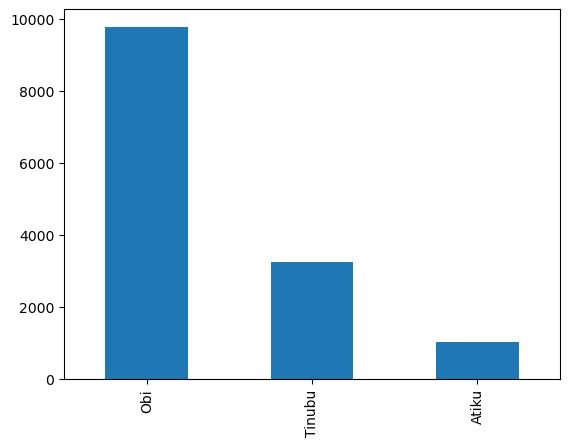

In [544]:
new_df.mentions.value_counts().plot(kind="bar")

In [545]:
df2= new_df.copy()

## ML Model

#### Data Preparation - Encoding for the Candidates

In [546]:
mentions_dict = {'Obi': 0, 'Tinubu': 1,'Atiku': 2}
df2['mentions'] = df2['mentions'].map(mentions_dict)

#### Splitting the Dataset into Training and Testing Sets

In [547]:
X = df2[['text', 'user_location', 'sentiment']]
y = df2['mentions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Sentiment Mapping

In [548]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df2['sentiment'] = df2['sentiment'].map(sentiment_map)
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(df2['text']).toarray()
onehot_encoder = OneHotEncoder(sparse_output=False)  
X_location = onehot_encoder.fit_transform(df2[['user_location']])
X_combined = np.hstack((X_tfidf, df2['sentiment'].values.reshape(-1, 1), X_location))
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.25, random_state=42)



#### The Models

In [549]:
# Initialize models
rf_model = RandomForestClassifier()  # Random Forest Classifier
nb_model = GaussianNB()  # Naive Bayes
svm_model = SVC()  # Support Vector Machine
dt_model = DecisionTreeClassifier()  # Decision Tree Classifier



#### Making Predictions

In [550]:

models = {'Random Forest': rf_model, 'Naive Bayes': nb_model, 'SVM': svm_model, 'Decision Tree': dt_model}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy for classification models
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Random Forest Accuracy: 0.9795
Naive Bayes Accuracy: 0.8116
SVM Accuracy: 0.9582
Decision Tree Accuracy: 0.9682


#### Choosing the Best Performing Model 

In [551]:
# Step 6: Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9803921568627451
Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2417
           1       0.97      0.97      0.97       836
           2       0.98      0.92      0.95       266

    accuracy                           0.98      3519
   macro avg       0.98      0.96      0.97      3519
weighted avg       0.98      0.98      0.98      3519



In [552]:
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('random_forest_classification_report.csv')

In [553]:
new_df.head()

date_only       user_location sentiment  \
0   2023-01-23  Abakaliki, Nigeria  positive   
1   2023-01-23      Lagos, Nigeria  positive   
6   2023-01-23             Nigeria  positive   
10  2023-01-23             Nigeria   neutral   
12  2023-01-24             Nigeria   neutral   

                                                 text mentions  
0   #OBI and #wife storm kastina state today.\n\nS...      Obi  
1   If they can’t point to you one project , inves...      Obi  
6   Earlier today in Bayelsa for Atiku/Okowa Presi...    Atiku  
10  Do make your vote 🗳 count!\n#AtikuOkowa2023  #...      Obi  
12   Hmmm just vote #obidatti https://t.co/G57qsqvEIq      Obi

In [554]:
grouped = new_df.groupby(['mentions', 'sentiment']).size().unstack(fill_value=0)

table_data = grouped.reset_index()
print(table_data)


sentiment mentions  negative  neutral  positive
0            Atiku       229      356       442
1              Obi      1519     3339      4929
2           Tinubu       529     1174      1558


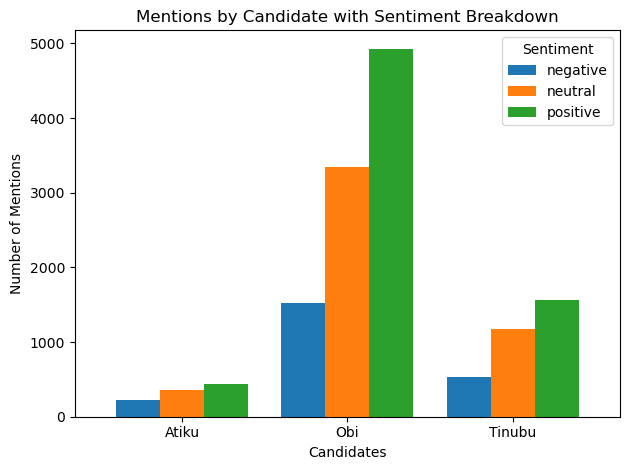

In [555]:
grouped.plot(kind='bar', width=0.8)
plt.title('Mentions by Candidate with Sentiment Breakdown')
plt.xlabel('Candidates')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [556]:
total_positive_mentions = grouped['positive'].sum()
total_positive_mentions

6929

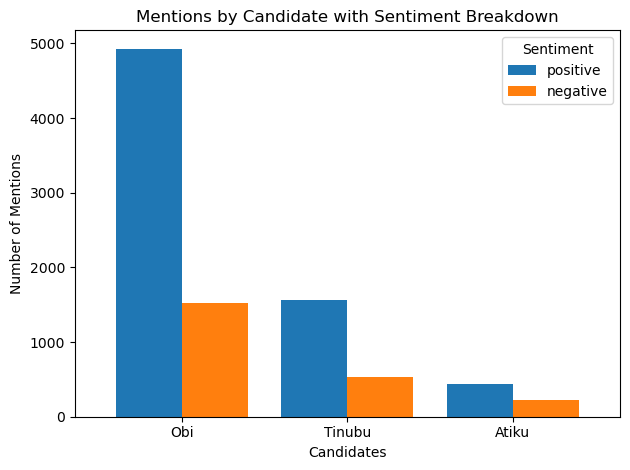

sentiment mentions  positive  negative  total  positive_percentage  rank
0              Obi      4929      1519   9787            71.135806   1.0
1           Tinubu      1558       529   3261            22.485207   2.0
2            Atiku       442       229   1027             6.378987   3.0


In [557]:
grouped = new_df.groupby(['mentions', 'sentiment']).size().unstack(fill_value=0)
grouped['total'] = grouped.sum(axis=1)
total_positive_mentions = grouped['positive'].sum()
grouped['positive_percentage'] = (grouped['positive'] / total_positive_mentions) * 100
grouped['rank'] = grouped['positive_percentage'].rank(ascending=False, method='min')
ranked_table = grouped.sort_values(by='rank')
ranked_table[['positive', 'negative']].plot(kind='bar', width=0.8)
plt.title('Mentions by Candidate with Sentiment Breakdown')
plt.xlabel('Candidates')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

#table
ranked_table = ranked_table.reset_index()
print(ranked_table[['mentions', 'positive', 'negative', 'total', 'positive_percentage', 'rank']])


In [558]:
ranked_table.to_csv("prediction.csv")

#### Comparing the Prediction Outcome the with Actual Result 

In [559]:
# Create a new DataFrame for predictions
pred_result = grouped[['positive_percentage']].reset_index()
pred_result.rename(columns={'positive_percentage': 'expected', 'mentions': 'candidate'}, inplace=True)

In [560]:

pred_result

sentiment candidate   expected
0             Atiku   6.378987
1               Obi  71.135806
2            Tinubu  22.485207

In [561]:
observed = [29.07, 25.40, 36.61] # election result gotten from wikipedia. 
pred_result["observed"] = observed 
pred_result['expected'] = pred_result['expected'].round(2)

In [562]:
pred_result.to_csv("pred_resul.csv", index = False) 
pred_result

sentiment candidate  expected  observed
0             Atiku      6.38     29.07
1               Obi     71.14     25.40
2            Tinubu     22.49     36.61

In [563]:
H0 = 'THERE ARE DIFFERENCES BETWEEN THE EXPECTED AND OBSERVED RESULT'
H1 = 'THERE ARE NO DIFFERENCES BETWEEN THE EXPECTED AND OBSERVED RESULT'

In [565]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(pred_result['expected'], pred_result['observed'])

results = {
    "F-Statistic": [f_stat],
    "P-Value": [p_value],
    "Conclusion": []
}

if p_value < 0.05:
    conclusion = f"We reject the null hypothesis and conclude that {H1}"
else:
    conclusion = f"We fail to reject the null hypothesis and conclude that {H0}"

results["Conclusion"].append(conclusion)

results_df = pd.DataFrame(results)

results_df.to_csv('anova_results.csv', index=False)


In [566]:
print(f"We fail to reject the null hypothesis and cnclude that {H0}")

We fail to reject the null hypothesis and cnclude that THERE ARE DIFFERENCES BETWEEN THE EXPECTED AND OBSERVED RESULT
